# Script to get the radio ILC residuals.

### Weights and residuals are provided for MV, tSZ-free, and CIB-free CMB/kSZ ILC maps.

#### Location of weights: publish/data/ilc_weights_residuals.npy
#### Location of radio source counts: publish/data/ilc_weights_residuals.npy

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np, sys, os, scipy as sc, warnings
sys.path.append('modules')
import tools
import matplotlib.cbook
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

#%pylab notebook
%matplotlib inline
from pylab import *


In [3]:
rcParams['figure.dpi'] = 150
rcParams['figure.facecolor'] = 'white'


In [27]:
#read file
use_radio_nulled_with_tsz_ilc = True
if use_radio_nulled_with_tsz_ilc:
    fname = 'publish/data/ilc_weights_residuals_agora_fg_model_radionulledwithtsz.npy'
else:
    fname = 'publish/data/ilc_weights_residuals_agora_fg_model.npy'
ilc_dict = np.load(fname, allow_pickle = True).item()
print(ilc_dict.keys())

#different types of ILC considered
ilc_keyname_arr = ilc_dict['ilc_keyname_arr']
print(ilc_keyname_arr)

#ILC weights
weights_dict = ilc_dict['weights']
print(weights_dict.keys())

#total ILC residuals
total_ilc_residuals_dict = ilc_dict['total_ilc_residuals']
print(total_ilc_residuals_dict.keys())

#CIB, tSZ, and CIB+tSZ
cib_ilc_residuals_dict = ilc_dict['cib_residuals']
tsz_ilc_residuals_dict = ilc_dict['tsz_residuals']
cib_plus_tsz_ilc_residuals_dict = ilc_dict['cib_plus_tsz_residuals']
print(cib_ilc_residuals_dict.keys())

#el range
els = ilc_dict['el']

dict_keys(['weights', 'total_ilc_residuals', 'cib_plus_tsz_residuals', 'cib_residuals', 'tsz_residuals', 'noise_residuals', 'radio_residuals', 'nl_TP_dict', 'cl_signal_plus_noise', 'ilc_keyname_arr', 'el'])
['mv' 'tszfree' 'cibfree' 'mvxcibfree' 'mvxtszfree' 'tszfreexcibfree'
 'tszfreeradiofree' 'tszfreeradiofreexcibfree']
dict_keys(['s4_wide'])
dict_keys(['s4_wide'])
dict_keys(['s4_wide'])


In [28]:
#some specs / definitions
exp_specs_dict = {'s4_wide': ['S4-Wide', 'black'], 
                  's4_deep': ['S4-Ultra Deep', 'darkred'], 
                  'spt3g': ['SPT-3G', 'darkgreen'],
                  'spt4': ['SPT-3G+SPT-4', 'goldenrod'],
                  'so_baseline': ['SO-Baseline', 'royalblue'],
                  'so_goal': ['SO-Goal', 'darkorange']}

#experiment ordering
exparr = ['spt3g', 'spt4', 'so_baseline', 'so_goal', 's4_wide', 's4_deep']

#ILC keynames
ilc_keyname_dict = {'mv':'MV', 'tszfree': 'tSZ-free', 'cibfree': 'CIB-free'}
if use_radio_nulled_with_tsz_ilc:
    ilc_keyname_dict = {'mv':'MV', 'tszfree': 'tSZ-free', 'tszfreeradiofree': 'tSZ+radio-free', 'cibfree': 'CIB-free'}

#pick a specify experiment and ILC
reqd_expname = 's4_wide'
reqd_ilc_keyname1 = 'tszfree'
if use_radio_nulled_with_tsz_ilc:
    reqd_ilc_keyname1 = 'tszfreeradiofree'
    
reqd_ilc_keyname2 = 'cibfree'
reqd_ilc_keyname_arr = [reqd_ilc_keyname1, reqd_ilc_keyname2]

#el range
els = ilc_dict['el']

assert reqd_ilc_keyname1 in ilc_keyname_arr
assert reqd_ilc_keyname2 in ilc_keyname_arr
assert reqd_expname in exp_specs_dict


#frequency bands
if reqd_expname in ['s4_wide', 's4_deep', 'so_baseline', 'so_goal']:
    nu_arr = [95, 150, 220, 285]
elif reqd_expname == 'spt3g':
    nu_arr = [95, 150, 220]#, 600, 857]
elif reqd_expname == 'spt4':
    nu_arr = [95, 150, 220, 285, 345]
band_color_dict = {95: 'navy', 150: 'darkgreen', 220: 'goldenrod', 285: 'orangered', 345: 'darkred'}

(4, 7000)


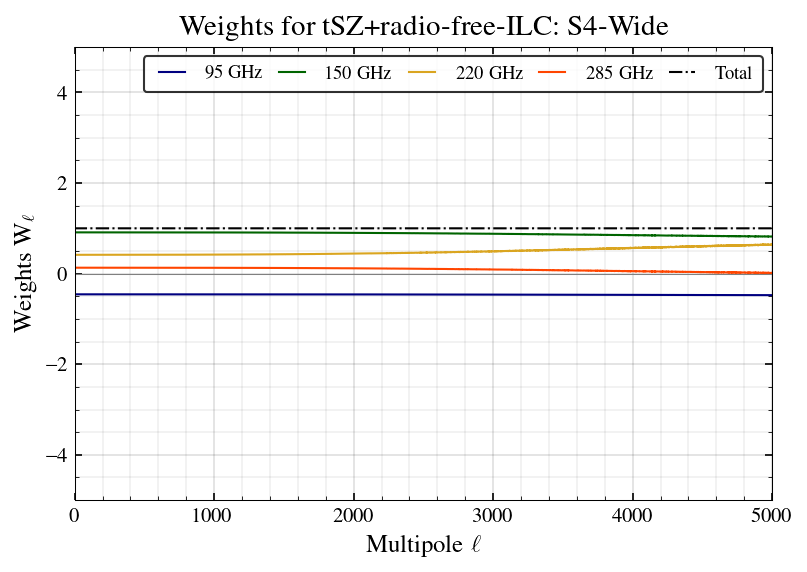

(4, 7000)


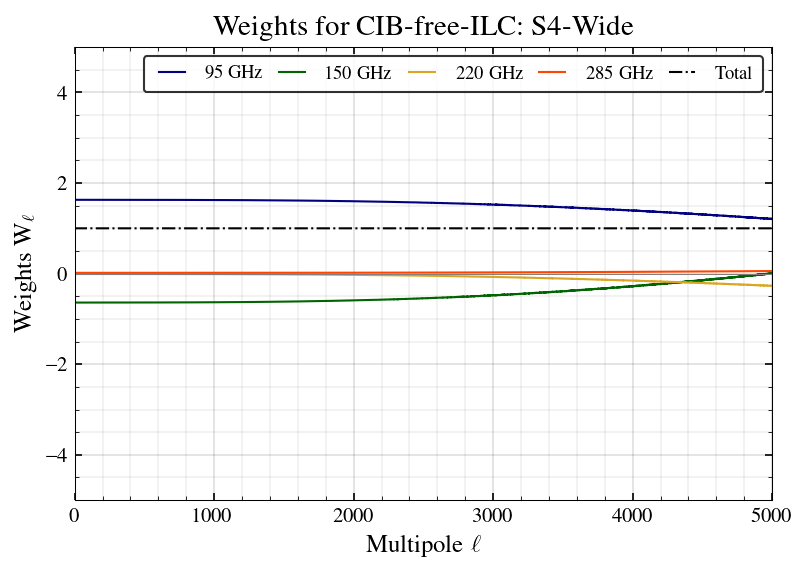

In [29]:
#get ILC weights (N_band x lmax array) and make plot
parent_weights_dic = {}
for reqd_ilc_keyname in reqd_ilc_keyname_arr:
    weights_arr = weights_dict[reqd_expname][reqd_ilc_keyname]
    parent_weights_dic[reqd_ilc_keyname] = weights_arr
    print(weights_arr.shape)

    #plot weights
    ax = subplot(111)
    fsval = 12

    for w, nu in zip(weights_arr, nu_arr):
        plot(els, w, color = band_color_dict[nu], label = r'%s GHz' %(nu))

    weights_sum = np.sum(weights_arr, axis = 0)
    plot(els, weights_sum, color = 'black', ls = '-.', label = r'Total')
    axhline(0., lw=0.5, color = 'gray')

    #title
    title_str = r'Weights for %s-ILC: %s' %(ilc_keyname_dict[reqd_ilc_keyname], exp_specs_dict[reqd_expname][0])
    title(title_str, fontsize = fsval+2)

    #legend
    legend(loc = 'best', fontsize = fsval-3, ncol = 5, columnspacing=0.5)

    #labels
    xlabel(r'Multipole $\ell$', fontsize = fsval)
    ylabel(r'Weights W$_{\ell}$', fontsize = fsval)

    #limits
    xmin, xmax = 0, 5000.
    #ymin, ymax = -1.2, 1.2
    ymin, ymax = -5., 5.
    xlim(xmin, xmax); ylim(ymin, ymax)

    #grid
    grid(which = 'major', axis = 'both', lw = 0.1, color = 'black')
    grid(which = 'minor', axis = 'both', lw = 0.05, color = 'black')

    show()

# Radio modelling: 
## $C_{\ell_{{\nu_{1} \nu_{2}}}}^{\rm radio} =  \int_{\alpha_{\rm rad}^{\rm min}}^{\alpha_{\rm rad}^{\rm max}} d\alpha \int_{0}^{S_{150}^{\rm max}} dS_{150}\ S_{150}^{2}
  \frac{dN}{dS_{150}}\ \left( \frac{\nu_{0}^{2}}{\nu_{1} \nu_{2}} \right)^\alpha \mathcal{N} \left[ \alpha_{\rm rad} | \bar{\alpha}_{\rm rad}, \sigma(\alpha_{\rm rad}) \right]$
  
# Residuals:
## $C_{\ell_{\rm ILC}}^{\rm rad} = w_{\ell_{A}} \mathbf{C_{\ell}}^{\rm rad}\ w_{\ell_{B}}^{\dagger}$

In [30]:
#get radio residuals

which_dnds_arr = ['dezotti', 'lagache']
#min_flux_mJy, max_flux_mJy = 0.1e-3, 3e-3

#Ideally, this must be zero but the power from radio sources below 0.1mJy does nto add anything signifacnt.
min_flux_mJy = 0.1e-3 

spec_index_radio = -0.76
#spec_index_radio_scatter_arr = [0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01]
spec_index_radio_scatter_arr = [0.6, 0.5, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01]

max_flux_mJy_arr = [1e-3, 2e-3, 3e-3, 4e-3]

parent_radio_cl_dict = {}
for max_flux_mJy in max_flux_mJy_arr:
    print('\nMax flux cut = %s mJy' %(max_flux_mJy * 1e3))
    w1, w2 = parent_weights_dic[reqd_ilc_keyname1], parent_weights_dic[reqd_ilc_keyname2] #weights for the two ILC maps.
    radio_cl_dict = tools.get_radio_ilc_residuals(els, nu_arr, w1, w2, which_dnds_arr, 
                                                  min_flux_mJy = min_flux_mJy, max_flux_mJy = max_flux_mJy, 
                                                  spec_index_radio = spec_index_radio, 
                                                  spec_index_radio_scatter_arr = spec_index_radio_scatter_arr)

    print(radio_cl_dict.keys())
    parent_radio_cl_dict['%smJy' %(max_flux_mJy*1e3)] = radio_cl_dict

if use_radio_nulled_with_tsz_ilc:
    opfname = 'publish/data/radio_residuals_analytic_radionulledwithtsz.npy'
else:
    opfname = 'publish/data/radio_residuals_analytic.npy'

np.save(opfname, parent_radio_cl_dict)
print('\nPlease check %s for analytic radio residual results\n' %(opfname))


Max flux cut = 1.0 mJy
	dN/ds = dezotti
		alpha = -0.76; scatter = 0.6
		alpha = -0.76; scatter = 0.5
		alpha = -0.76; scatter = 0.4
		alpha = -0.76; scatter = 0.35
		alpha = -0.76; scatter = 0.3
		alpha = -0.76; scatter = 0.25
		alpha = -0.76; scatter = 0.2
		alpha = -0.76; scatter = 0.15
		alpha = -0.76; scatter = 0.1
		alpha = -0.76; scatter = 0.05
		alpha = -0.76; scatter = 0.01
	dN/ds = lagache
		alpha = -0.76; scatter = 0.6
		alpha = -0.76; scatter = 0.5
		alpha = -0.76; scatter = 0.4
		alpha = -0.76; scatter = 0.35
		alpha = -0.76; scatter = 0.3
		alpha = -0.76; scatter = 0.25
		alpha = -0.76; scatter = 0.2
		alpha = -0.76; scatter = 0.15
		alpha = -0.76; scatter = 0.1
		alpha = -0.76; scatter = 0.05
		alpha = -0.76; scatter = 0.01
dict_keys(['dezotti', 'lagache'])

Max flux cut = 2.0 mJy
	dN/ds = dezotti
		alpha = -0.76; scatter = 0.6
		alpha = -0.76; scatter = 0.5
		alpha = -0.76; scatter = 0.4
		alpha = -0.76; scatter = 0.35
		alpha = -0.76; scatter = 0.3
		alpha = -0.76; sc

In [32]:
#get Agora radio residuals

which_dnds_arr = ['agora']
#min_flux_mJy, max_flux_mJy = 0.1e-3, 3e-3

#Ideally, this must be zero but the power from radio sources below 0.1mJy does nto add anything signifacnt.
min_flux_mJy = 0.1e-3 

spec_index_radio = -0.76
spec_index_radio_scatter_arr = [0.6, 0.4, 0.3, 0.2, 0.01]

max_flux_mJy_arr = [1e-3, 2e-3, 3e-3, 4e-3]

parent_agora_radio_cl_dict = {}
for max_flux_mJy in max_flux_mJy_arr:
    print('\nMax flux cut = %s mJy' %(max_flux_mJy * 1e3))
    w1, w2 = parent_weights_dic[reqd_ilc_keyname1], parent_weights_dic[reqd_ilc_keyname2] #weights for the two ILC maps.
    agora_radio_cl_dict = tools.get_radio_ilc_residuals(els, nu_arr, w1, w2, which_dnds_arr, 
                                                  min_flux_mJy = min_flux_mJy, max_flux_mJy = max_flux_mJy, 
                                                  spec_index_radio = spec_index_radio, 
                                                  spec_index_radio_scatter_arr = spec_index_radio_scatter_arr)

    parent_agora_radio_cl_dict['%smJy' %(max_flux_mJy*1e3)] = agora_radio_cl_dict

print(parent_agora_radio_cl_dict.keys())
if use_radio_nulled_with_tsz_ilc:
    opfname = 'publish/data/radio_residuals_agora_radionulledwithtsz.npy'
else:
    opfname = 'publish/data/radio_residuals_agora.npy'
np.save(opfname, parent_agora_radio_cl_dict)
print('\nPlease check %s for analytic radio residual results\n' %(opfname))


Max flux cut = 1.0 mJy
	dN/ds = agora
		alpha = -0.76; scatter = 0.6
		alpha = -0.76; scatter = 0.4
		alpha = -0.76; scatter = 0.3
		alpha = -0.76; scatter = 0.2
		alpha = -0.76; scatter = 0.01

Max flux cut = 2.0 mJy
	dN/ds = agora
		alpha = -0.76; scatter = 0.6
		alpha = -0.76; scatter = 0.4
		alpha = -0.76; scatter = 0.3
		alpha = -0.76; scatter = 0.2
		alpha = -0.76; scatter = 0.01

Max flux cut = 3.0 mJy
	dN/ds = agora
		alpha = -0.76; scatter = 0.6
		alpha = -0.76; scatter = 0.4
		alpha = -0.76; scatter = 0.3
		alpha = -0.76; scatter = 0.2
		alpha = -0.76; scatter = 0.01

Max flux cut = 4.0 mJy
	dN/ds = agora
		alpha = -0.76; scatter = 0.6
		alpha = -0.76; scatter = 0.4
		alpha = -0.76; scatter = 0.3
		alpha = -0.76; scatter = 0.2
		alpha = -0.76; scatter = 0.01
dict_keys(['1.0mJy', '2.0mJy', '3.0mJy', '4.0mJy'])

Please check publish/data/radio_residuals_agora_radionulledwithtsz.npy for analytic radio residual results

